# Description:

This notebook contains several experiments related with analysing the features of the embedding vectors of each document. We hypothesize that even though the features don't have an exact meaning like in PCA, we can still extract some interpretation by looking at the feature values.

In [1]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch

from src import PROJECT_ROOT

In [2]:
data_file = os.path.join(PROJECT_ROOT, "data","processed", "newsapi_docs.csv")
df = pd.read_csv(data_file, header=None, names=['collection', 'datetime', 'topic', 'original', 'split', 'clean'])
df = df.loc[df['split'] == 'test']
df.shape

(15500, 6)

In [3]:
df.head()

,collection,datetime,topic,original,split,clean
61998,top_headlines,2021-03-05T06:25:28,technology,Monster Hunter Mii Fighters coming to Super Sm...,test,monster hunter mii fighter come super smash br...
61999,top_headlines,2021-04-14T14:25:30,entertainment,Universal's Latest Dracula Spinoff Has Found a...,test,univers latest dracula spinoff ha found new di...
62000,everything,2021-03-28T22:25:31,technology,New York rolls out first digital COVID-19 vacc...,test,new york roll first digit covid19 vaccin passp...
62001,everything,2021-03-05T14:25:32,entertainment,'What I Like About You' is a binge-worthy earl...,test,like bingeworthi earli 2000 hidden gem frantic...
62002,top_headlines,2021-04-08T22:25:30,health,Blood Test Developed to Detect Depression and ...,test,blood test develop detect depress bipolar diso...


## Using Doc2vec and analyzing the dimension patterns

In [4]:
embeddings_file = os.path.join(PROJECT_ROOT, "outputs/saved_embeddings/test_doc2vecdbowd100n5mc2t12.npy")
embeddings = np.load(embeddings_file)
embeddings.shape

(15500, 100)

In [5]:
# What is the embedding for the 1st article?
print('Original text: \n', df.iloc[0]['original'], '\n')
print('Cleaned text: \n', df.iloc[0]['clean'], '\n')
print('Embedding: \n', embeddings[0, :])

Original text: 
 Monster Hunter Mii Fighters coming to Super Smash Bros. Ultimate - Polygon It’s good news/bad news for Monster Hunter fans who play Super Smash Bros. Ultimate. The latest batch of Mii Fighter DLC includes Monster Hunter- and Ghosts ’n Goblins-inspired costumes. New Mii Fighter costumes de-confirm a dedicated MonHun guest fighter 

Cleaned text: 
 monster hunter mii fighter come super smash bro ultim polygon good newsbad news monster hunter fan play super smash bro ultim latest batch mii fighter dlc includ monster hunter ghost n goblinsinspir costum new mii fighter costum deconfirm dedic monhun guest fighter 

Embedding: 
 [ 0.22425303  0.31620178 -0.4054977  -0.05132221  0.15841803 -0.16505075
  0.25143152  0.1761244   0.1834964   0.14328592  0.04947448 -0.25164276
 -0.49051663  0.54755086 -0.30411965  0.25085327  0.17503786  0.13767435
  0.02607295 -0.06913625 -0.41918325  1.0457077  -0.05953033  0.09149338
 -0.73371917 -0.1804911   0.07087918 -0.01273903  0.72640663 

In [6]:
# Finding the 5 most similar documents to the document above
similarity = cosine_similarity(embeddings[0, :].reshape(1, -1), embeddings)
arg_sort = np.argsort(similarity.flatten())[::-1]
print('Original texts: \n', df.iloc[arg_sort]['original'].head().values, '\n')
print('Embeddings: \n', embeddings[arg_sort][:5])

Original texts: 
 ['Monster Hunter Mii Fighters coming to Super Smash Bros. Ultimate - Polygon It’s good news/bad news for Monster Hunter fans who play Super Smash Bros. Ultimate. The latest batch of Mii Fighter DLC includes Monster Hunter- and Ghosts ’n Goblins-inspired costumes. New Mii Fighter costumes de-confirm a dedicated MonHun guest fighter'
 'Sorry, Monster Hunter fans: Monster Hunter Mii Fighters are coming to Smash Bros. It’s good news/bad news for Monster Hunter fans who play Super Smash Bros. Ultimate. The latest batch of Mii Fighter DLC includes Monster Hunter- and Ghosts ’n Goblins-inspired costumes. Image: Nintendo  New Mii Fighter costumes ‘de-confirm’ a dedicated MonHun guest fighter  Continue reading'
 'Monster Hunter Stories 2: Wings Of Ruin will land on PC in July - Rock Paper Shotgun Bond with your monsties and also your besties Capcom have hatched some good news for PC-playing Monster Hunter fans. The upcoming Monster Hunter Stories 2: Wings Of Ruin is launching 

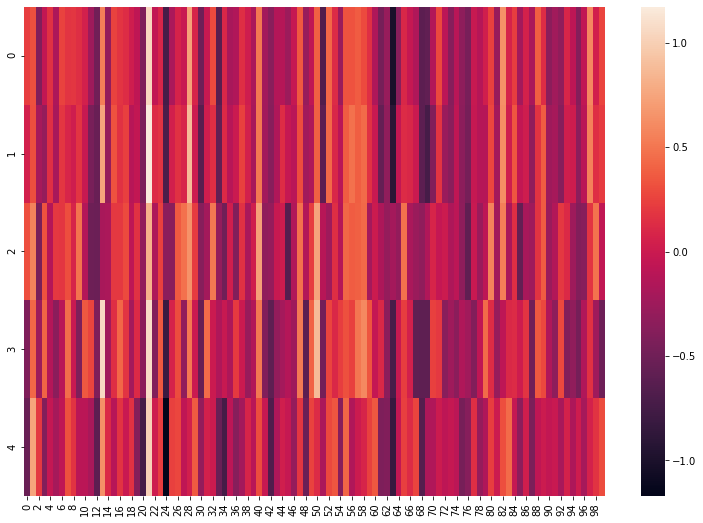

In [7]:
# Visualizing the feature vectors relationship between the close articles
plt.figure(figsize=(13,9))
sns.heatmap(embeddings[arg_sort][:5])
plt.show()

It looks that the related documents all have high values in dimension 21. Let's further investigate this dimension and see what other documents have high values in it. The same happens with dimension 24 and 63 with low values. Let's explore.

In [8]:
# Top 10 21st dimension articles
df.iloc[np.argsort(embeddings[:, 21])[::-1]]['original'].head(10).values

array(["Netflix wants in on streaming new blockbusters, signs exclusive deal with Sony - The A.V. Club Variety announced that Netflix has signed a deal with Sony that will give the streaming site rights to stream Sony's new releases, starting 2022. Netflix also gets to include older titles from Sony's library. When the next films in the Spider-Man, Venom, and Jumanji series leave theaters next year, theyll be heading to a new streaming home. Variety reports that Netflix has won a nearly two-year auction fo",
       'The Russo Brothers Directed the Latest ‘Fortnite’ Cinematic Opener (EXCLUSIVE) - Variety Anthony and Joe Russo are huge fans of “Fortnite” — and the filmmakers, known for their blockbuster Marvel movies, teamed with Epic Games to direct the cinematic opener for the popular battle royale game’s latest installment. Epic on Tuesday launched “Fortnit Anthony and Joe Russo are huge fans of “Fortnite” — and the filmmakers, known for their blockbuster Marvel movies, teamed with Ep

Dimension 21 seems to be about entertainment (movies, music, netflix, hule, hbo) with the exception of the article talking about Russia.

In [9]:
# Bottom 10 24th dimension articles
df.iloc[np.argsort(embeddings[:, 24])]['original'].head(10).values

array(["Chicago review board releases body cam footage of fatal police shooting of 13-year-old boy Chicago's independent police review board on Thursday released the body camera footage of an officer's fatal shooting of 13-year-old Adam Toledo on March 29.The big picture: Tension continues to rise nationwide in response to police misconduct and racism. Thu Chicago's independent police review board on Thursday released the body camera footage of an officer's fatal shooting of 13-year-old Adam Toledo on March 29.The big picture: Tension continues to ri",
       "Manhattan prosecutors are focusing their investigation on Trump's Seven Springs Estate in New York Manhattan investigators are reportedly focusing on Trump's Seven Springs estate in New York which he tried unsuccessfully to develop. New York prosecutors have intensified their investigation into Donald Trump's Seven Springs estate in New York as they continue to probe his finances, the Wall Street Journal reported.Investigators",


Dimension 24 seems to be about US justice, sports, related articles

In [10]:
# Bottom 10 63rd dimension articles
df.iloc[np.argsort(embeddings[:, 63])]['original'].head(10).values

array(['Lil Nas X and GOP South Dakota Gov Kristi Noem got into a Twitter fight over his Satan-themed sneaker range made with human blood Summary List PlacementLil Nas X hit argued with South Dakota Gov. Kristi Noem after the Republican seized on his Satan-themed sneaker range to warn that America is engaged in a battle for its soul.\xa0The rapper announced over the weekend that he is releasing t Lil Nas X hit argued with South Dakota Gov. Kristi Noem after the Republican seized on his Satan-themed sneaker range to warn that America is engaged in a battle for its soul.\xa0The rapper announced ',
       "Chipotle goes glam with new beauty collaboration, with an eye toward Gen Z consumers - Yahoo Finance Here's why a Chipotle and e.l.f. beauty collaboration just makes sense. Chipotle (CMG) and e.l.f. Beauty (ELF) have come together yet again to serve up a makeup collection with a key audience in mind - Generation Z.The new collaboration, dubbed 'e.l.f x Chipotle,' incl",
       'TIME and

## Testing SBERT

In [11]:
# SBERT model
model = SentenceTransformer('paraphrase-distilroberta-base-v2')

# Check if CUDA is available and switch to GPU (optional - it detects automatically)
if torch.cuda.is_available():
    model = model.to(torch.device("cuda"))
print(model.device)

# Encode all sentences - this will require a substancial amount of RAM
embeddings = model.encode(df['original'].tolist())

  0%|          | 0.00/305M [00:00<?, ?B/s]

cuda:0


In [12]:
# Compute cosine similarity between all pairs
cos_sim = util.pytorch_cos_sim(embeddings, embeddings)

In [ ]:
# Get top K most similar documents
top_values, flat_idx = torch.topk((cos_sim - torch.eye(cos_sim.shape[0])).flatten(), 1000, largest=True)
orig_idx = [np.unravel_index(i, cos_sim.shape) for i in flat_idx]

print("Top-1000 most similar pairs:")
for v, (i, j) in zip(top_values, orig_idx):
    print("{} \t {} \t {:.4f} \n".format(df['original'].iloc[i], df['original'].iloc[j], v))

In [ ]:
# What is the embedding for the 1st article?
print('Original text: \n', df.iloc[0]['original'], '\n')
print('Embedding: \n', embeddings[0, :])

In [ ]:
# Finding the 5 most similar documents to the document above
arg_sort = torch.topk(cos_sim[0], 5).indices
print('Original texts: \n', df.iloc[arg_sort]['original'].values, '\n')
print('Embeddings: \n', embeddings[arg_sort])

In [ ]:
# Visualizing the feature vectors relationship between the close articles
plt.figure(figsize=(13,9))
sns.heatmap(embeddings[arg_sort])
plt.show()